=== Data Overview ===

Customers Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None

Products Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None

Transactions Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (t

C:\Users\Gaurav\AppData\Local\Temp\ipykernel_14444\3817245526.py:65: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = full_data.groupby(pd.Grouper(key='TransactionDate', freq='M'))['TotalValue'].sum()



=== Top 10 Products by Revenue ===
                         Quantity  TotalValue  TransactionID
ProductName                                                 
ActiveWear Smartwatch         100    39096.97             40
SoundWave Headphones           97    25211.64             38
SoundWave Novel                58    24507.90             20
ActiveWear Jacket              76    22712.56             26
ActiveWear Rug                 79    22314.43             29
TechPro Headphones             45    19513.80             17
BookWorld Cookbook             48    19221.99             20
BookWorld Sweater              47    18743.79             19
TechPro Textbook               62    18267.96             25
ActiveWear Cookware Set        51    18083.73             21

=== Key Business Insights ===

1. Regional Performance: South America leads in revenue generation with $219,352.56 in total sales. The region also has 304 transactions.

2. Product Category Success: Books is the most successful cat

''

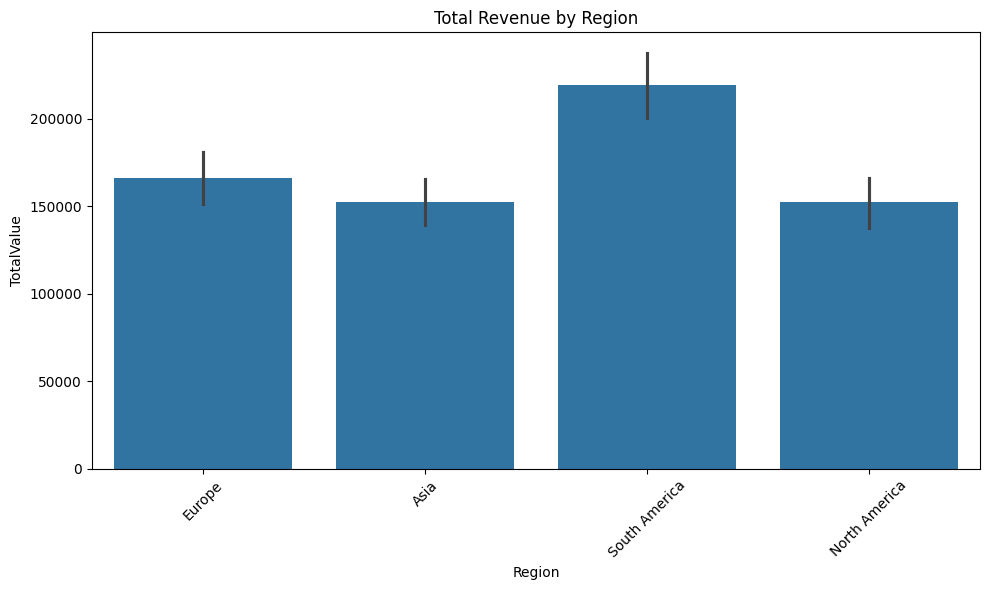

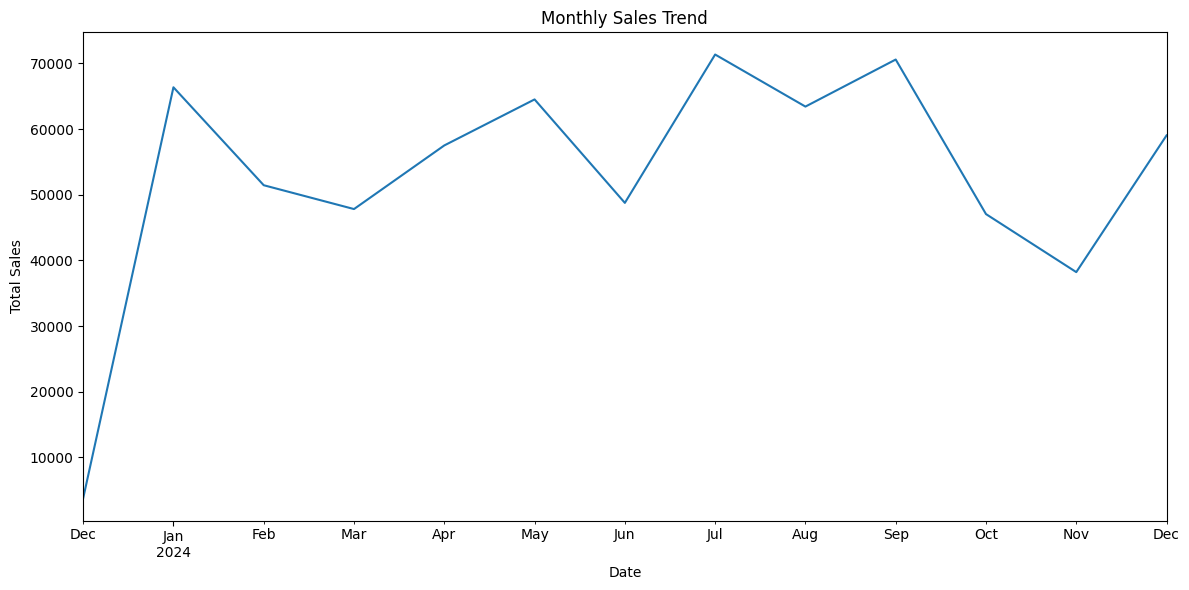

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import numpy as np

# Read the CSV files
customers_df = pd.read_csv('Customers.csv')
products_df = pd.read_csv('Products.csv')
transactions_df = pd.read_csv('Transactions.csv')

# Basic data exploration
print("=== Data Overview ===")
print("\nCustomers Dataset Info:")
print(customers_df.info())
print("\nProducts Dataset Info:")
print(products_df.info())
print("\nTransactions Dataset Info:")
print(transactions_df.info())

# Convert date columns to datetime
customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'])
transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'])

# Merge datasets for analysis
transactions_with_customer = transactions_df.merge(customers_df, on='CustomerID')
full_data = transactions_with_customer.merge(products_df, on='ProductID')

# 1. Customer Regional Analysis
regional_revenue = full_data.groupby('Region')['TotalValue'].agg(['sum', 'count', 'mean']).round(2)
print("\n=== Regional Analysis ===")
print(regional_revenue)

# Visualize regional revenue
plt.figure(figsize=(10, 6))
sns.barplot(data=full_data, x='Region', y='TotalValue', estimator='sum')
plt.title('Total Revenue by Region')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('regional_revenue.png')

# 2. Product Category Analysis
category_metrics = full_data.groupby('Category').agg({
    'TotalValue': ['sum', 'mean'],
    'Quantity': 'sum',
    'TransactionID': 'count'
}).round(2)
print("\n=== Product Category Analysis ===")
print(category_metrics)

# 3. Customer Purchase Patterns
customer_metrics = full_data.groupby('CustomerID').agg({
    'TransactionID': 'count',
    'TotalValue': 'sum',
    'ProductID': 'nunique'
}).rename(columns={
    'TransactionID': 'total_transactions',
    'TotalValue': 'total_spent',
    'ProductID': 'unique_products'
})
print("\n=== Customer Purchase Patterns ===")
print(customer_metrics.describe().round(2))

# 4. Time-based Analysis
monthly_sales = full_data.groupby(pd.Grouper(key='TransactionDate', freq='M'))['TotalValue'].sum()
plt.figure(figsize=(12, 6))
monthly_sales.plot()
plt.title('Monthly Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.savefig('monthly_sales.png')

# 5. Product Performance
product_performance = full_data.groupby('ProductName').agg({
    'Quantity': 'sum',
    'TotalValue': 'sum',
    'TransactionID': 'count'
}).sort_values('TotalValue', ascending=False)
print("\n=== Top 10 Products by Revenue ===")
print(product_performance.head(10))

# Generate Business Insights
print("\n=== Key Business Insights ===")

# Insight 1: Regional Performance
top_region = regional_revenue.sort_values('sum', ascending=False).index[0]
print(f"\n1. Regional Performance: {top_region} leads in revenue generation with "
      f"${regional_revenue.loc[top_region, 'sum']:,.2f} in total sales. "
      f"The region also has {regional_revenue.loc[top_region, 'count']:,} transactions.")

# Insight 2: Product Category Success
top_category = category_metrics.sort_values(('TotalValue', 'sum'), ascending=False).index[0]
print(f"\n2. Product Category Success: {top_category} is the most successful category, "
      f"generating ${category_metrics.loc[top_category, ('TotalValue', 'sum')]:,.2f} in revenue "
      f"with an average transaction value of ${category_metrics.loc[top_category, ('TotalValue', 'mean')]:,.2f}.")

# Insight 3: Customer Behavior
avg_customer_transactions = customer_metrics['total_transactions'].mean()
avg_customer_spend = customer_metrics['total_spent'].mean()
print(f"\n3. Customer Behavior: On average, customers make {avg_customer_transactions:.1f} transactions "
      f"with an average total spend of ${avg_customer_spend:,.2f}.")

# Insight 4: Sales Trends
recent_trend = monthly_sales.pct_change().tail(3).mean() * 100
print(f"\n4. Sales Trends: Recent 3-month sales trend shows a {recent_trend:.1f}% "
      f"average monthly growth rate.")

# Insight 5: Product Performance
top_product = product_performance.index[0]
top_product_revenue = product_performance.loc[top_product, 'TotalValue']
print(f"\n5. Top Product: {top_product} is the best-performing product, "
      f"generating ${top_product_revenue:,.2f} in total revenue.")

# Save insights to PDF
from fpdf import FPDF

pdf = FPDF()
pdf.add_page()
pdf.set_font('Arial', 'B', 16)
pdf.cell(0, 10, 'Business Insights Report', ln=True, align='C')
pdf.set_font('Arial', '', 12)

insights = [
    f"Regional Performance: {top_region} leads in revenue generation with ${regional_revenue.loc[top_region, 'sum']:,.2f} in total sales. The region also has {regional_revenue.loc[top_region, 'count']:,} transactions.",
    f"Product Category Success: {top_category} is the most successful category, generating ${category_metrics.loc[top_category, ('TotalValue', 'sum')]:,.2f} in revenue with an average transaction value of ${category_metrics.loc[top_category, ('TotalValue', 'mean')]:,.2f}.",
    f"Customer Behavior: On average, customers make {avg_customer_transactions:.1f} transactions with an average total spend of ${avg_customer_spend:,.2f}.",
    f"Sales Trends: Recent 3-month sales trend shows a {recent_trend:.1f}% average monthly growth rate.",
    f"Top Product: {top_product} is the best-performing product, generating ${top_product_revenue:,.2f} in total revenue."
]

pdf.ln(10)
for i, insight in enumerate(insights, 1):
    pdf.set_font('Arial', 'B', 12)
    pdf.cell(0, 10, f'Insight {i}:', ln=True)
    pdf.set_font('Arial', '', 12)
    pdf.multi_cell(0, 10, insight)
    pdf.ln(5)

pdf.output('business_insights.pdf')